In [370]:
import numpy as np
import pandas as pd

In [371]:
df_data = pd.read_csv('kidney_disease.csv')

In [372]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [373]:
df_data['ba'].unique()


array(['notpresent', 'present', nan], dtype=object)

In [374]:
df_data.shape

(400, 26)

In [375]:
df_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [376]:
df_data.drop('id', axis=1, inplace=True)

In [377]:
df_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [378]:
df_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [379]:
text_columns=['pc','wc','rc']
for i in text_columns:
    print(f"{i} : {df_data[i].dtype}")

pc : object
wc : object
rc : object


In [380]:
def convert_text_to_numeric(df_data, column):
    df_data[column] = pd.to_numeric(df_data[column], errors='coerce')

    for column in text_columns:
        convert_text_to_numeric(df_data,  column)
        print(f"{column} : {df_data[column].dtype}")

In [381]:
missing = df_data.isnull().sum()
missing[missing>0].sort_values(ascending=False).head(20)



rbc     152
rc      130
wc      105
pot      88
sod      87
pcv      70
pc       65
hemo     52
su       49
sg       47
al       46
bgr      44
bu       19
sc       17
bp       12
age       9
ba        4
pcc       4
htn       2
dm        2
dtype: int64

In [382]:
def mean_value_impulation(df_data, column):
    mean_value = df_data[column].mean()
    df_data[column].fillna(value=mean_value, inplace=True)

def mode_value_imputation(df_data, column):
    mode = df_data[column].mode()[0]
    df_data[column] = df_data[column].fillna(mode)

In [383]:
df_data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [384]:
num_cols = [col for col in df_data.columns if df_data[col].dtype!='object']

for col_name in num_cols:
    mean_value_impulation(df_data,col_name)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_29360\4090943372.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data[column].fillna(value=mean_value, inplace=True)


In [385]:
cat_cols = [col for col in df_data.columns if df_data[col].dtype=='object']

for col_name in cat_cols:
    mode_value_imputation(df_data, col_name)

In [386]:

missing = df_data.isnull().sum()
missing[missing>0].sort_values(ascending=False).head(20)


Series([], dtype: int64)

In [387]:
df_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [388]:
print(f"dm:-{df_data['dm'].unique()}")
print(f"cad:-{df_data['cad'].unique()}")
print(f"classification :-{df_data['classification'].unique()}")

dm:-['yes' 'no' ' yes' '\tno' '\tyes']
cad:-['no' 'yes' '\tno']
classification :-['ckd' 'ckd\t' 'notckd']


In [389]:
df_data['dm'] =df_data['dm'].replace(to_replace={' yes':'yes', '\tno': 'no' ,'\tyes':'yes'})
df_data['cad'] =df_data['cad'].replace(to_replace={'\tno':'no'})
df_data['classification'] =df_data['classification'].replace(to_replace={'ckd\t':'ckd', 'notckd':'not ckd'})

In [390]:
print(f"dm:-{df_data['dm'].unique()}")
print(f"cad:-{df_data['cad'].unique()}")
print(f"classification :-{df_data['classification'].unique()}")

dm:-['yes' 'no']
cad:-['no' 'yes']
classification :-['ckd' 'not ckd']


In [391]:
df_data['classification'] = df_data['classification'].map({'ckd':1 , 'not ckd':0})
df_data['rbc'] = df_data['rbc'].map({'normal':1 , 'abnormal':0})
df_data['pc'] = df_data['pc'].map({'normal':1 , 'abnormal':0})
df_data['pcc'] = df_data['pcc'].map({'present':1 , 'notpresent':0})
df_data['ba'] = df_data['ba'].map({'present':1 , 'notpresent':0})
df_data['htn'] = df_data['htn'].map({'yes':1 , 'no':0})
df_data['dm'] = df_data['dm'].map({'yes':1 , 'no':0})
df_data['cad'] = df_data['cad'].map({'yes':1 , 'no':0})
df_data['appet'] = df_data['appet'].map({'good':1 , 'poor':0})
df_data['pe'] = df_data['pe'].map({'yes':1 , 'no':0})
df_data['ane'] = df_data['ane'].map({'yes':1 , 'no':0})



In [392]:
df_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44,7800,5.2,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38,6000,5.2,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31,7500,5.2,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32,6700,3.9,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35,7300,4.6,0,0,0,1,0,0,1


In [393]:
import matplotlib.pyplot as plt
import seaborn as sns

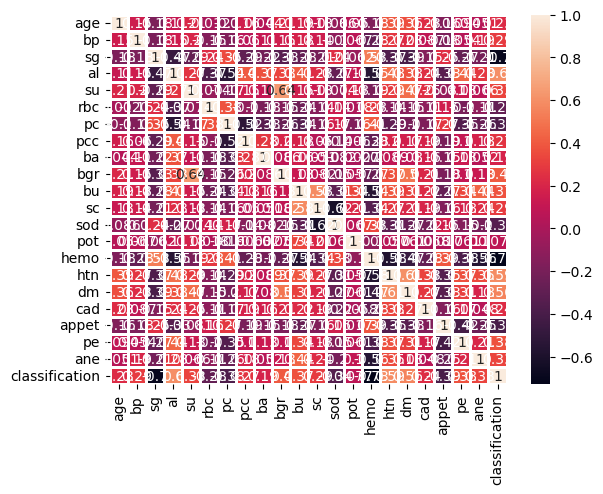

In [394]:
df_data_numeric = df_data.select_dtypes(include=['number'])
sns.heatmap(df_data_numeric.corr(), annot=True, linewidths=0.9)
plt.show()


In [395]:
df_data['classification'].value_counts()

classification
1    250
0    150
Name: count, dtype: int64

In [396]:
from sklearn.model_selection import train_test_split

In [397]:
X = df_data.drop("classification", axis=1)
y = df_data["classification"]

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=25)

print(f" 'X' shape: {X_train.shape}")
print(f" 'Xtest' shape: {X_test.shape}")




 'X' shape: (300, 24)
 'Xtest' shape: (100, 24)


In [398]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC








In [399]:
models =[]
models.append(('Naive Bayas', GaussianNB))
models.append(('KNN', KNeighborsClassifier(n_neighbors=8)))
models.append(('RandomForestClassifier', RandomForestClassifier))
#models.append(('SVM', SVC(Kernel='linear')))

In [400]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [401]:
for name, model in models:
    print(name, model)
    print()

    models.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print("accuracy:" , accuracy_score(y_test,y_pred))
    print('\n')
    print("precision: ",recall_score(y_test,y_pred))
    print('\n')
    print("recall: ",recall_score(y_test,y_pred))
    print('\n')
    print("fiscore: ",f1_score(y_test,y_pred))
    print('\n')
    




Naive Bayas <class 'sklearn.naive_bayes.GaussianNB'>



AttributeError: 'list' object has no attribute 'fit'

In [402]:
for name, model in models:  # Unpack each tuple into name and model
    print(name, model)
    print()

    # Fit the individual model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print the confusion matrix and metrics
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print("accuracy:", accuracy_score(y_test, y_pred))
    print('\n')
    print("precision:", precision_score(y_test, y_pred, average='binary'))
    print('\n')
    print("recall:", recall_score(y_test, y_pred, average='binary'))
    print('\n')
    print("f1score:", f1_score(y_test, y_pred, average='binary'))
    print('\n')


Naive Bayas <class 'sklearn.naive_bayes.GaussianNB'>



AttributeError: 'DataFrame' object has no attribute '_validate_params'